In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv(r"C:\Users\Loges\Downloads\Datasets\teleCust1000t.csv")
data

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [3]:
data.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


<Axes: >

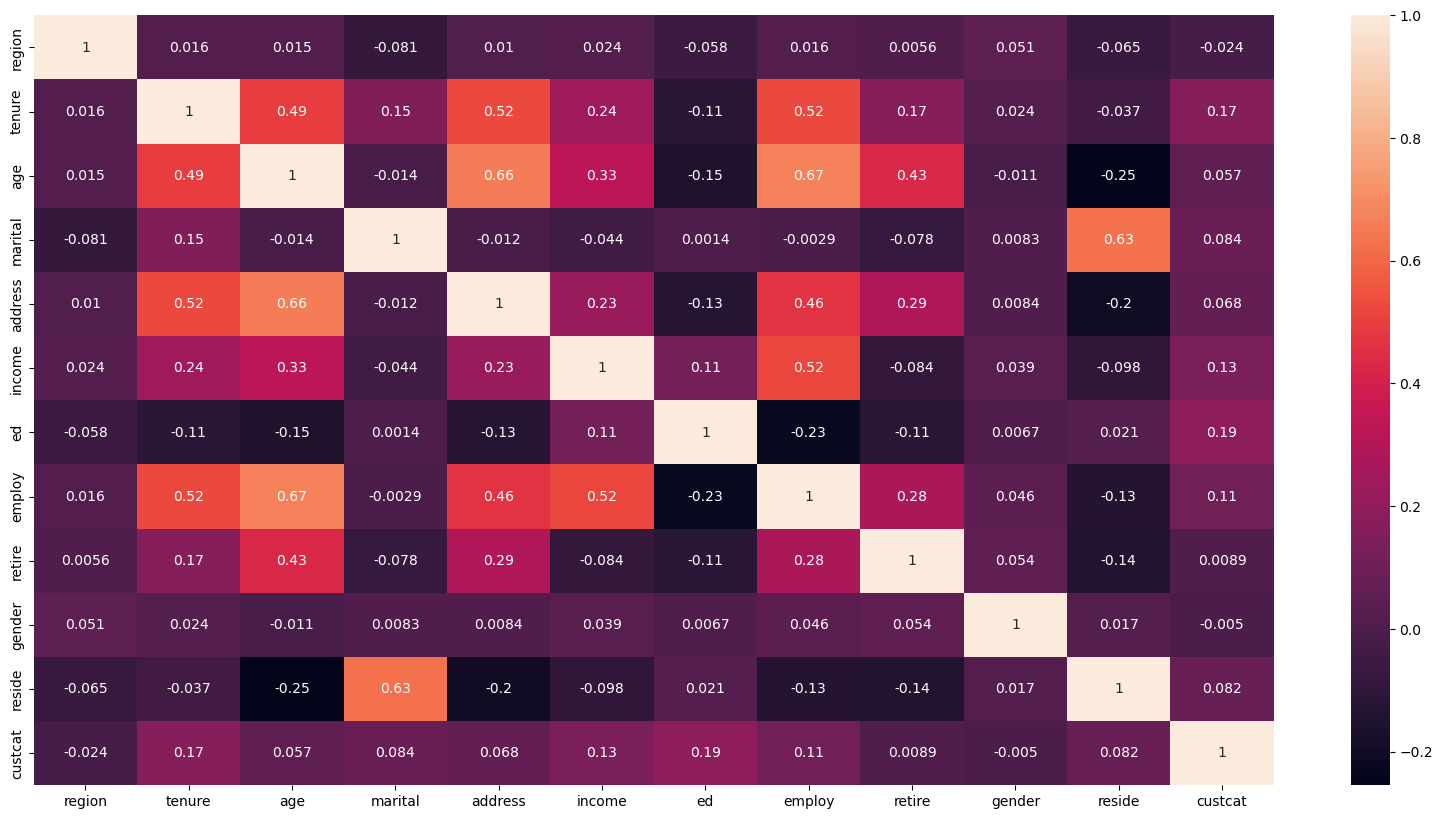

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

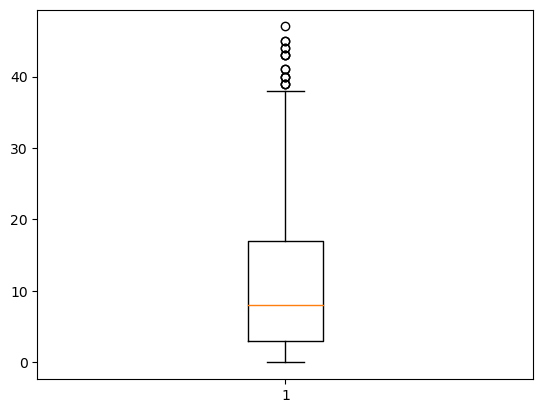

In [24]:
plt.boxplot(data['employ'])
plt.show()

Text(0.5, 1.0, 'Customer Category = 4')

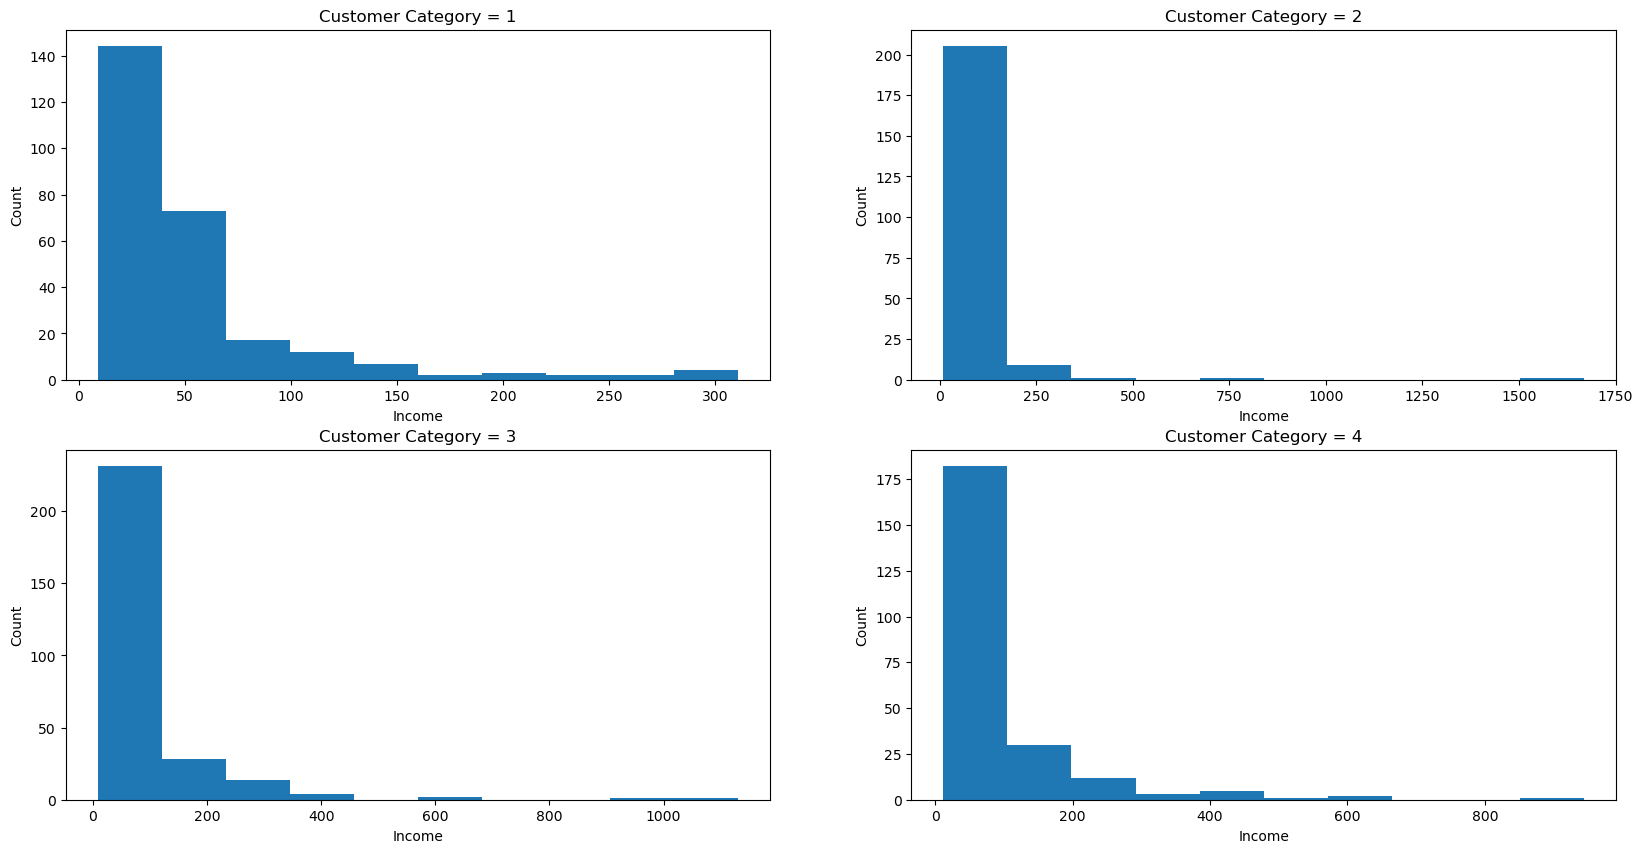

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.hist(x='income', data=data[data.custcat==1])
plt.xlabel('Income')
plt.ylabel('Count')
plt.title("Customer Category = 1")

plt.subplot(2,2,2)
plt.hist(x='income', data=data[data.custcat==2])
plt.xlabel('Income')
plt.ylabel('Count')
plt.title("Customer Category = 2")

plt.subplot(2,2,3)
plt.hist(x='income', data=data[data.custcat==3])
plt.xlabel('Income')
plt.ylabel('Count')
plt.title("Customer Category = 3")

plt.subplot(2,2,4)
plt.hist(x='income', data=data[data.custcat==4])
plt.xlabel('Income')
plt.ylabel('Count')
plt.title("Customer Category = 4")

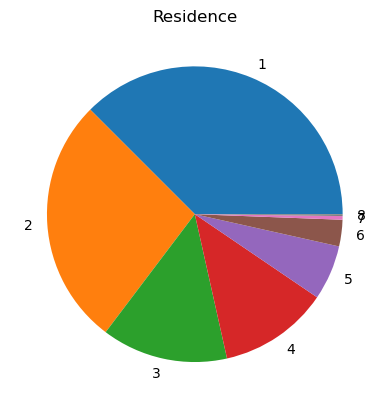

In [33]:
height=data['reside'].value_counts()
plt.pie(height, labels=height.index)
plt.title('Residence')
plt.show()

In [34]:
df = data.drop(['custcat'], axis=1)
target = data['custcat']
target

0      1
1      4
2      3
3      1
4      3
      ..
995    1
996    1
997    4
998    3
999    2
Name: custcat, Length: 1000, dtype: int64

In [35]:
x_tr, x_te, y_tr, y_te = train_test_split(df, target, random_state=123)
x_te

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
131,2,7,35,1,0,47.0,1,14,0.0,0,5
203,2,63,63,1,19,191.0,3,27,0.0,0,2
50,2,30,34,1,4,27.0,2,1,0.0,0,5
585,3,44,45,1,19,88.0,1,21,0.0,0,2
138,3,23,25,1,6,38.0,2,1,0.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...
653,3,24,58,1,30,24.0,1,5,0.0,0,2
11,3,7,35,0,14,80.0,2,15,0.0,1,1
252,1,52,54,1,5,153.0,5,10,0.0,0,2
521,1,48,41,0,21,43.0,2,7,0.0,0,1


In [46]:
classifier = KNeighborsClassifier(n_neighbors=39)
classifier.fit(x_tr, y_tr)

KNeighborsClassifier(n_neighbors=39)

In [47]:
y_pr=classifier.predict(x_te)
y_pr

array([1, 3, 3, 3, 3, 3, 2, 2, 4, 3, 1, 1, 2, 2, 4, 3, 1, 3, 3, 3, 2, 4,
       3, 1, 1, 1, 1, 3, 4, 4, 1, 1, 1, 1, 1, 2, 1, 4, 1, 3, 1, 3, 1, 1,
       1, 2, 1, 3, 1, 3, 3, 1, 4, 3, 2, 4, 1, 1, 4, 2, 3, 3, 3, 1, 1, 3,
       2, 3, 2, 1, 1, 4, 1, 1, 1, 3, 1, 1, 3, 4, 3, 1, 3, 2, 3, 2, 1, 2,
       3, 3, 3, 1, 1, 1, 3, 1, 2, 1, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 1,
       4, 1, 4, 3, 1, 4, 2, 3, 1, 3, 2, 3, 1, 2, 3, 1, 3, 1, 3, 1, 1, 3,
       1, 3, 1, 1, 1, 3, 1, 3, 4, 1, 1, 1, 3, 1, 1, 4, 1, 1, 3, 2, 1, 2,
       1, 3, 3, 2, 2, 1, 2, 1, 3, 3, 2, 1, 1, 3, 3, 4, 3, 1, 1, 3, 2, 2,
       1, 1, 2, 3, 2, 3, 2, 3, 1, 1, 3, 3, 1, 1, 1, 3, 3, 2, 3, 4, 4, 1,
       3, 1, 2, 1, 3, 3, 4, 4, 2, 1, 3, 1, 1, 2, 3, 3, 1, 3, 1, 4, 3, 4,
       3, 1, 2, 2, 1, 1, 3, 2, 1, 1, 3, 1, 4, 3, 3, 3, 2, 4, 2, 3, 1, 1,
       1, 3, 2, 1, 1, 3, 2, 3], dtype=int64)

In [48]:
print("Accuracy Score:",accuracy_score(y_pr, y_te))

Accuracy Score: 0.38


In [43]:
acc=[]
for n in range(2, 100):
    classifier = KNeighborsClassifier(n_neighbors=n)
    classifier.fit(x_tr, y_tr)
    y_pr=classifier.predict(x_te)
    acc.append(accuracy_score(y_pr, y_te))

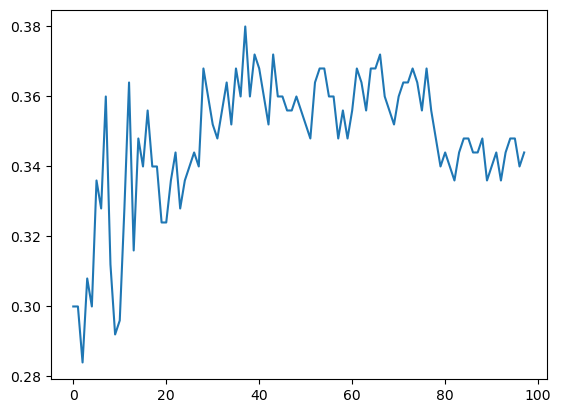

In [44]:
plt.plot(acc)

In [45]:
print("The optimal number of neighbors required is:", 2+acc.index(max(acc)))

The optimal number of neighbors required is: 39
